In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, roc_auc_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

import pickle

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
class uji(): 
    def __init__(self,data): 
        df0 = pd.read_csv('../data2/uji%snorm.csv'%data, delimiter= ",", header=None)
        df0=df0.fillna(0)
        self.com=df0[0]
        self.prot=df0[1282]
        self.x =df0.drop([0,1282], axis=1)
        df0[1300]=0
        
        self.y=df0[1300]
        self.dt=data
class latih(): 
    def __init__(self,data): 
        df = pd.read_csv("../data2/%s.csv"%data, delimiter=',')
        df.head()
        self.X = df.drop(['0','1282','label'], axis=1)
        self.Y = df['label']
        self.dt=data
def dtuji(data): 
    return uji(data) 
def dtlatih(data): 
    return latih(data) 

dtf =dtuji('mbafika') #dtf.com, dtf.prot, dtf.x, dtf.y, dtf.dt
dtl =dtuji('mbalinda') #dtl.com, dtl.prot, dtl.x, dtl.y dtl.dt
df= dtlatih('latih_parted') #df.X,df.Y,df.dt

In [3]:

class latih2(): 
    def __init__(self,data): 
        df = pd.read_csv("../data3/%s.csv"%data, delimiter=',')
        df.head()
        self.X = df.drop(['label'], axis=1)
        self.Y = df['label']
        self.dt=data

def dtlatih2(data): 
    return latih2(data) 

df1= dtlatih2('hasilsmote_1') #df1.X,df1.Y,df1.dt
df2= dtlatih2('hasilsmote_2') #df2.X,df2.Y,df2.dt
df3= dtlatih2('hasilsmote_3') #df3.X,df3.Y,df3.dt
df4= dtlatih2('hasilsmote_4') #df4.X,df4.Y,df4.dt
df5= dtlatih2('hasilsmote_5') #df5.X,df5.Y,df5.dt

In [4]:
class model3(): 
    def __init__(self,model,nama): 
        rf = pickle.load(open('../data3/model/{0}'.format(model), 'rb'))
        self.mod=rf
        self.nm=nama
        # plot the roc curve for the model
def load_mdt3(model,nama): 
    return model3(model,nama) 
class model2(): 
    def __init__(self,model,nama): 
        rf = pickle.load(open('../data2/model/{0}'.format(model), 'rb'))
        self.mod=rf
        self.nm=nama
        # plot the roc curve for the model
def load_mdt2(model,nama): 
    return model2(model,nama) 

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [6]:

def prediksi(md,model,p,data,d):
    pred_x = pd.DataFrame(md.predict_proba(data.x))
    prob_x = pd.DataFrame(np.where(pred_x >= p, 1,0))
    print("threshold {0} ".format(p))
    print("{0}_hasilsmote_{1} ".format(model,d))
    print("hasil prediksi ",data.dt," : (0,1)")
    print(confusion_matrix(data.y, prob_x[1]))
    pred = pd.DataFrame(prob_x[1])
    pred=pred.drop([0])
    pred[2] = data.com
    pred[3] = data.prot
    #print(pred.head())
    #print(prob_x)
    pred[4] = pred_x[1]
    #print(pred.head())
    #print(pd.DataFrame(prob_x)[1].head())
    pred.to_excel('../data3/hasil_pred/{0}_{1}p_{2}_modelhasilsmote{3}.xlsx'.format(model,p,data.dt,d))

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [59]:
#rf5_100n_1000m.cv_results_#['mean_test_score']
#stds = clf.cv_results_['std_test_score']
def print_cv_results(rf):
    #rf = pickle.load(open('../data3/model/{0}'.format(o.dt), 'rb'))
    #print('{0}'.format(model))
    print('AUC0 :',rf.cv_results_['mean_test_AUC'])
    print('ALL :',rf.cv_results_)
    print('AUC :',rf.cv_results_['mean_test_AUC'][(rf.cv_results_['rank_test_AUC']-1)[0]])
    print('Accuracy :',rf.cv_results_['mean_test_Accuracy'][(rf.cv_results_['rank_test_Accuracy']-1)[0]])
    print('F-measure :',rf.cv_results_['mean_test_F-measure'][(rf.cv_results_['rank_test_F-measure']-1)[0]])
    print('Precision :',rf.cv_results_['mean_test_Precision'][(rf.cv_results_['rank_test_Precision']-1)[0]])
    print('Recall :',rf.cv_results_['mean_test_Recall'][(rf.cv_results_['rank_test_Recall']-1)[0]])

In [9]:
scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy','F-measure':'f1','Precision':'precision', 'Recall':'recall'}


In [10]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc


In [11]:
from sklearn.metrics import plot_roc_curve

In [12]:
mlpsmote=load_mdt3('mlp_hasilsmote_5','mlp_smote')
rfsmote=load_mdt3('rf_100n_1000m_hasilsmote_2','rf_smote')

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.21.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.label module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklear

In [13]:
svmsmote=load_mdt3('svm_rbf_hasilsmote_5','svm_smote')

In [21]:
svmbalanced=load_mdt2('svm1_10n_100m_balanced','svm_balanced')
svmnb=load_mdt2('svm3_0n_0m_balanced','svm_notbalanced')

D:\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [15]:
rfbalanced=load_mdt2('rf_300n_2500m_balanced','rf_balanced')
rfnb=load_mdt2('rf_300n_2500m','rf_notbalanced')

In [16]:
mlpbalanced=load_mdt2('mlp_10n_100m_balanced','mlp_balanced')
mlpnb=load_mdt2('mlp4','mlp_notbalanced')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
def roccurve1(df,model):
    ## Load Data (Python conform)
    print("DATA OVERVIEW")
    print("\nActive file full dimensions (rows, columns): ", df.X.shape)

    ## Define Input/Output
    X = df.X
    y = df.Y

    ## Data splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
    
    grid = model
    
    ###ROC Curve
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score

    probs = grid.predict_proba(X_test)
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)

    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC : %f'%auc)
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()


    print()
    print("AUC ROC REPORT")
    print()
    print('AUC score: %.2f' % auc)

    fpr, tpr, thresholds = roc_curve(y_test, probs)

    plot_roc_curve(fpr, tpr)

In [19]:
def roccurve2(df,model,df1,model1):
    ## Load Data (Python conform)
    print("DATA OVERVIEW")
    print("\nActive file full dimensions (rows, columns): ", df.X.shape)

    ## Define Input/Output
    X = df.X
    y = df.Y

    ## Data splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
    
    grid = model
    
    ###ROC Curve
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score

    probs = grid.predict_proba(X_test)
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)

    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC : %f'%auc)
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()


    print()
    print("AUC ROC REPORT")
    print()
    print('AUC score: %.2f' % auc)

    fpr, tpr, thresholds = roc_curve(y_test, probs)

    plot_roc_curve(fpr, tpr)

In [20]:
roccurve1(df,svmnb.mod)

NameError: name 'svmnb' is not defined

In [ ]:
roccurve1(df,rfnb.mod)

In [ ]:
roccurve1(df,mlpnb.mod)

In [ ]:
roccurve1(df,svmbalanced.mod)

In [ ]:
roccurve1(df,rfbalanced.mod)

In [ ]:
roccurve1(df,mlpbalanced.mod)

In [ ]:
roccurve1(df5,svmsmote.mod)

In [ ]:
roccurve1(df3,rfsmote.mod)

In [ ]:
roccurve1(df5,mlpsmote.mod)

In [ ]:
stopifnot(nrow(df) %% 5 == 0)
df    <- df[order(runif(nrow(df))), ]
bins  <- rep(1:N, nrow(df) / N)
split(df, bins)

In [ ]:
df.X[].head()

In [ ]:
tprs = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

cv = cv = StratifiedKFold(n_splits=5)
classifier = rfbalanced.mod

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
    probas_ = classifier.predict_proba(df.X.iloc[test])
    fpr, tpr, thresholds = roc_curve(df.Y.iloc[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

# mean_tpr /= len(cv)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# pl.plot(mean_fpr, mean_tpr, 'k--',
#         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

# pl.xlim([-0.05, 1.05])
# pl.ylim([-0.05, 1.05])
# pl.xlabel('False Positive Rate')
# pl.ylabel('True Positive Rate')
# pl.title('Receiver operating characteristic example')
# pl.legend(loc="lower right")
# pl.show()

In [ ]:
mean_tpr = np.mean(tpr, axis=0)
#mean_tpr[-1] = 1.0
mean_tpr

In [ ]:
mean_tpr[-1]=1.0

In [ ]:
mean_tpr = np.mean(tpr, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
cross_val_score(svmbalanced.mod,df.X, df.Y, cv=5)

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
n_samples = df.X.shape[0]

# Add noisy features
random_state = np.random.RandomState(0)
xxx = np.c_[df.X, random_state.randn(n_samples)]

In [ ]:
np.

In [ ]:
df.X.tail()

In [ ]:
df.Y.tail()

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
#n_samples = df.X.shape[0]

# Add noisy features
random_state = np.random.RandomState(0)
#X = np.c_[df.X, random_state.randn(n_samples)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
#classifier = svm.SVC(kernel='linear', probability=True,
#                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
classifier=rfbalanced.mod

fig, ax = plt.subplots()
for i, (test) in enumerate(cv.split(df.X.values[test], df.Y.values[test],random_state=random_state)):
    viz = plot_roc_curve(classifier, df.X.values[test], df.Y.values[test],name='ROC fold {}'.format(i),alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

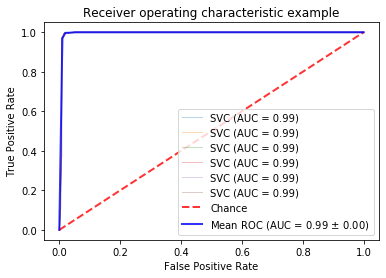

In [27]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
n_samples, n_features = df.X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[df.X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
classifier=svmnb.mod

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
    classifier.fit(df.X, df.Y)
    viz = plot_roc_curve(classifier, df.X, df.Y,
                         #name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)
                #label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

D:\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


TypeError: '<' not supported between instances of 'NoneType' and 'float'

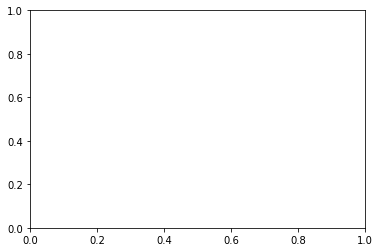

In [28]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#X, y = X[y != 2], y[y != 2]
n_samples, n_features = df.X.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[df.X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
classifier=rfbalanced.mod

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
    classifier.fit(df.X, df.Y)
    viz = plot_roc_curve(classifier, df.X, df.Y,
                         #name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)
                #label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [20]:
class probs(): 
    def __init__(self,data,model): 
        probsmlp = model.mod.predict_proba(data.X)
        # keep probabilities for the positive outcome only
        mlp_probs = probsmlp[:, 1]
        # calculate scores
        mlp_auc = roc_auc_score(data.Y, mlp_probs)
        print('{0}: ROC AUC=%.3f'.format(model.nm) % (mlp_auc))
        # calculate roc curves
        self.fpr, self.tpr, _ = roc_curve(data.Y, mlp_probs)
        # plot the roc curve for the model
def curveroc(data,model): 
    return probs(data,model) 


mlp_smote: ROC AUC=0.988
mlp_balanced: ROC AUC=0.944
mlp_notbalanced: ROC AUC=0.999


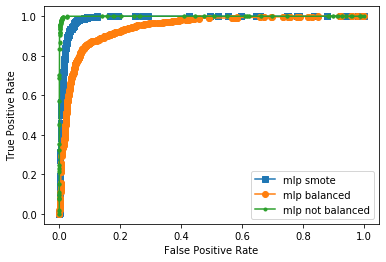

In [57]:
ms=curveroc(df,mlpsmote)
mb=curveroc(df,mlpbalanced)
mn=curveroc(df,mlpnb)

pyplot.plot(ms.fpr, ms.tpr, marker='s', label='mlp smote')
pyplot.plot(mb.fpr, mb.tpr, marker='o', label='mlp balanced')
pyplot.plot(mn.fpr, mn.tpr, marker='.', label='mlp not balanced')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

rf_smote: ROC AUC=0.966
rf_balanced: ROC AUC=0.999
rf_notbalanced: ROC AUC=0.999


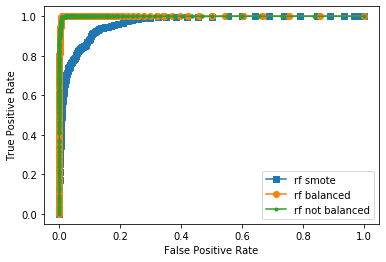

In [58]:
rs=curveroc(df,rfsmote)
rb=curveroc(df,rfbalanced)
rn=curveroc(df,rfnb)

pyplot.plot(rs.fpr, rs.tpr, marker='s', label='rf smote')
pyplot.plot(rb.fpr, rb.tpr, marker='o', label='rf balanced')
pyplot.plot(rn.fpr, rn.tpr, marker='.', label='rf not balanced')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

svm_smote: ROC AUC=0.943
svm_balanced: ROC AUC=0.941
svm_notbalanced: ROC AUC=0.993


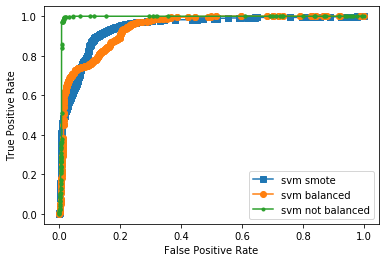

In [64]:
sm=curveroc(df,svmsmote)
sb=curveroc(df,svmbalanced)
sn=curveroc(df,svmnb)

pyplot.plot(sm.fpr, sm.tpr, marker='s', label='svm smote')
pyplot.plot(sb.fpr, sb.tpr, marker='o', label='svm balanced')
pyplot.plot(sn.fpr, sn.tpr, marker='.', label='svm not balanced')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [17]:
def pred3(model,p,datauji1,datauji2,datauji3,d):
    md=load_model(model,d)
    prediksi(md,model,p,datauji1,d)
    prediksi(md,model,p,datauji2,d)
    prediksi(md,model,p,datauji3,d)
def pred2(model,p,datauji1,datauji2,d):
    md=load_model(model,d)
    prediksi(md,model,p,datauji1,d)
    prediksi(md,model,p,datauji2,d)
def pred(model,p,datauji1,d):
    md=load_model(model,d)
    prediksi(md,model,p,datauji1,d)

In [21]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from scipy import interp

In [19]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from scipy import interp

seed = 7
np.random.seed(seed)

iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True, random_state=seed)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

i= 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)

    i += 1
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
pl.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

#pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc_1 = auc(mean_fpr, mean_tpr)
print ("#--- Method 1 to calculate mean AUC ---")
print( mean_auc_1)
pl.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)'%(mean_auc_1), #$\pm$ %0.2f)' % (mean_auc_1, std_auc),
        lw=2, alpha=.8)
    

print("#--- Method 2 to calculate mean AUC ---")
results = cross_val_score(classifier, X, y, cv=cv)
mean_auc_2 =  "{:.3f}".format(results.mean())
print (mean_auc_2)

NameError: name 'pl' is not defined

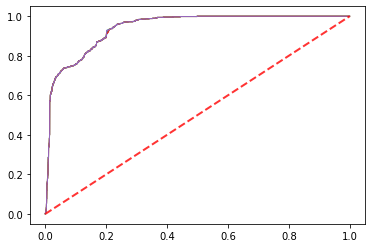

In [137]:
tpr = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

cv = StratifiedKFold(n_splits=5)
classifier = rfbalanced.mod

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
    probas_ = classifier.fit(df.X, df.Y).predict_proba(df.X)
    fpr, tpr, thresholds = roc_curve(df.Y, probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)



In [140]:
tpr

array([0., 0., 1., 1.])

In [138]:
mean_tpr = np.mean(tpr, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


TypeError: 'numpy.float64' object does not support item assignment

#--- Method 1 to calculate mean AUC ---
0.9410838310108383
#--- Method 2 to calculate mean AUC ---
0.500


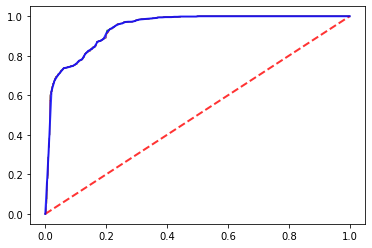

In [142]:
tpr = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

cv = StratifiedKFold(n_splits=5)
classifier = svmbalanced.mod

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
    probas_ = classifier.fit(df.X, df.Y).predict_proba(df.X)
    fpr, tpr, thresholds = roc_curve(df.Y, probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr /= cv.get_n_splits(df.X, df.Y)
mean_tpr[-1] = 1.0
mean_auc_1 = auc(mean_fpr, mean_tpr)
print ("#--- Method 1 to calculate mean AUC ---")
print( mean_auc_1)
pl.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)'%(mean_auc_1), #$\pm$ %0.2f)' % (mean_auc_1, std_auc),
        lw=2, alpha=.8)
    

print("#--- Method 2 to calculate mean AUC ---")
results = cross_val_score(classifier, df.X, df.Y, cv=cv)
mean_auc_2 =  "{:.3f}".format(results.mean())
print (mean_auc_2)

#--- Method 1 to calculate mean AUC ---
0.9411098694272206


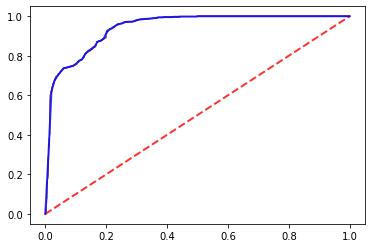

In [143]:
tpr = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

cv = StratifiedKFold(n_splits=5)
classifier = svmbalanced.mod

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
    probas_ = classifier.fit(df.X, df.Y).predict_proba(df.X)
    fpr, tpr, thresholds = roc_curve(df.Y, probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr /= cv.get_n_splits(df.X, df.Y)
mean_tpr[-1] = 1.0
mean_auc_1 = auc(mean_fpr, mean_tpr)
print ("#--- Method 1 to calculate mean AUC ---")
print( mean_auc_1)
pl.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)'%(mean_auc_1), #$\pm$ %0.2f)' % (mean_auc_1, std_auc),
        lw=2, alpha=.8)
pl.show()  

In [146]:
print("#--- Method 2 to calculate mean AUC ---")
results = cross_val_score(classifier, df.X, df.Y, cv=cv)
mean_auc_2 =  "{:.3f}".format(results.mean())
print (mean_auc_2)

#--- Method 2 to calculate mean AUC ---
0.834


#--- Method 1 to calculate mean AUC ---
0.9949456719124197


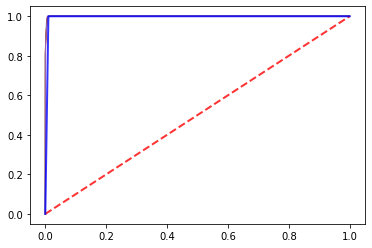

In [172]:
tpr = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

cv = StratifiedKFold(n_splits=5)
classifier = rfbalanced.mod

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
    probas_ = classifier.fit(df.X, df.Y).predict_proba(df.X)
    fpr, tpr, thresholds = roc_curve(df.Y, probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr /= cv.get_n_splits(df.X, df.Y)
mean_tpr[-1] = 1.0
mean_auc_1 = auc(mean_fpr, mean_tpr)
print ("#--- Method 1 to calculate mean AUC ---")
print( mean_auc_1)
pl.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)'%(mean_auc_1), #$\pm$ %0.2f)' % (mean_auc_1, std_auc),
        lw=2, alpha=.8)
pl.legend()

ValueError: error_score must be the string 'raise' or a numeric value. (Hint: if using 'raise', please make sure that it has been spelled correctly.)

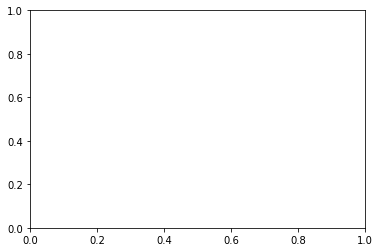

In [174]:
tpr = []
aucs = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

cv = StratifiedKFold(n_splits=5)
classifier = mlpnb.mod

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
    probas_ = classifier.fit(df.X, df.Y).predict_proba(df.X)
    fpr, tpr, thresholds = roc_curve(df.Y, probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr /= cv.get_n_splits(df.X, df.Y)
mean_tpr[-1] = 1.0
mean_auc_1 = auc(mean_fpr, mean_tpr)
print ("#--- Method 1 to calculate mean AUC ---")
print( mean_auc_1)
pl.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)'%(mean_auc_1), #$\pm$ %0.2f)' % (mean_auc_1, std_auc),
        lw=2, alpha=.8)
pl.legend()

In [22]:
class probs(): 
    def __init__(self,data,model): 
        probsmlp = model.mod.predict_proba(data.X)
        # keep probabilities for the positive outcome only
        mlp_probs = probsmlp[:, 1]
        # calculate scores
        mlp_auc = roc_auc_score(data.Y, mlp_probs)
        print('{0}: ROC AUC=%.3f'.format(model.nm) % (mlp_auc))
        # calculate roc curves
        self.fpr, self.tpr, _ = roc_curve(data.Y, mlp_probs)
        # plot the roc curve for the model
def curveroc(data,model): 
    return probs(data,model) 


In [23]:
class tfpr(): 
    def __init__(self,classifier,df): 
        tpr = []
        aucs = []
        mean_tpr = 0.0
        mean_fpr = np.linspace(0, 1, 100)
        all_tpr = []

        cv = StratifiedKFold(n_splits=5)
        classifier = classifier.mod

        #fig, ax = plt.subplots()
        for i, (train, test) in enumerate(cv.split(df.X, df.Y)):
            probas_ = classifier.predict_proba(df.X.iloc[test])
            fpr, tpr, thresholds = roc_curve(df.Y.iloc[test], probas_[:, 1])
            mean_tpr += interp(mean_fpr, fpr, tpr)
            mean_tpr[0] = 0.0
            roc_auc = auc(fpr, tpr)
            #plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %f)' % (i, roc_auc))
        
        self.mfpr= mean_fpr
        self.mtpr =  mean_tpr
def calcc(classifier,df): 
    return tfpr(classifier,df) 


In [24]:
cv = StratifiedKFold(n_splits=5)

In [45]:
def plotaucroc(classifier,df,classifier2,df2):
    c1=calcc(classifier,df)
    c2=calcc(classifier2,df2)
    mean_tpr=c1.mtpr
    mean_fpr=c1.mfpr
    mean_tpr /= cv.get_n_splits(df.X, df.Y)
    mean_tpr[-1] = 1.0
    mean_auc_1 = auc(mean_fpr, mean_tpr)
    mean_tpr2=c2.mtpr
    mean_fpr2=c2.mfpr
    mean_tpr2 /= cv.get_n_splits(df2.X, df2.Y)
    mean_tpr2[-1] = 1.0
    mean_auc_2 = auc(mean_fpr2, mean_tpr2)
    #print( classifier.nm)
   # print ("#--- Method 1 to calculate mean AUC ---")
    #print( mean_auc_1)
    plt.plot(mean_fpr, mean_tpr, color='g',
            label=r'Mean ROC (AUC = %f),%s'%(mean_auc_1,classifier.nm), #$\pm$ %0.2f)' % (mean_auc_1, std_auc),
            lw=2, alpha=.8)
    #print( classifier2.nm)
   # print ("#--- Method 1 to calculate mean AUC ---")
    #print( mean_auc_2)
    plt.plot(mean_fpr2, mean_tpr2, color='b',
            label=r'Mean ROC (AUC = %f),%s'%(mean_auc_2,classifier2.nm), #$\pm$ %0.2f)' % (mean_auc_1, std_auc),
            lw=2, alpha=.8)
    #pl.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #            label='Chance', alpha=.8)
    plt.legend()
    plt.savefig('../data3/{0}({1})_{2}({3}).png'.format(classifier.nm,df.dt,classifier2.nm,df2.dt), bbox_inches='tight')
    plt.show()  

In [46]:
print_cv_results(svmbalanced.mod)

AttributeError: 'SVC' object has no attribute 'cv_results_'

In [47]:
print_cv_results(rfsmote.mod)

AUC0 : [0.98375491]
ALL : {'mean_fit_time': array([50.31451607]), 'std_fit_time': array([5.11741782]), 'mean_score_time': array([17.22432537]), 'std_score_time': array([3.26129148]), 'param_max_samples': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[100],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'max_samples': 1000, 'n_estimators': 100}], 'split0_test_AUC': array([0.93963288]), 'split1_test_AUC': array([0.9950127]), 'split2_test_AUC': array([0.994807]), 'split3_test_AUC': array([0.99493637]), 'split4_test_AUC': array([0.99442809]), 'mean_test_AUC': array([0.98375491]), 'std_test_AUC': array([0.02207261]), 'rank_test_AUC': array([1]), 'split0_train_AUC': array([0.99885033]), 'split1_train_AUC': array([0.99505808]), 'split2_train_AUC': array([0.99480162]), 'split3_train_AUC': array([0.99440689]), 'split4_train_AUC': array([0.99504032]), 'mean_t

In [48]:
print_cv_results(svmsmote.mod)

AUC0 : [0.98024689]
ALL : {'mean_fit_time': array([189.08447685]), 'std_fit_time': array([25.95297724]), 'mean_score_time': array([13.31818008]), 'std_score_time': array([1.07271052]), 'param_C': masked_array(data=[0.5],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.0078125],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.5, 'gamma': 0.0078125, 'kernel': 'rbf'}], 'split0_test_AUC': array([0.9287972]), 'split1_test_AUC': array([0.99397683]), 'split2_test_AUC': array([0.98771693]), 'split3_test_AUC': array([0.99398016]), 'split4_test_AUC': array([0.99676335]), 'mean_test_AUC': array([0.98024689]), 'std_test_AUC': array([0.02589509]), 'rank_test_AUC': array([1]), 'split0_train_AUC': array([0.99607093]), 'split1_train_AUC': array([0.98410601]), 'split2_train

In [49]:
print_cv_results(svmsmote.mod)

AUC0 : [0.98024689]
ALL : {'mean_fit_time': array([189.08447685]), 'std_fit_time': array([25.95297724]), 'mean_score_time': array([13.31818008]), 'std_score_time': array([1.07271052]), 'param_C': masked_array(data=[0.5],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.0078125],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.5, 'gamma': 0.0078125, 'kernel': 'rbf'}], 'split0_test_AUC': array([0.9287972]), 'split1_test_AUC': array([0.99397683]), 'split2_test_AUC': array([0.98771693]), 'split3_test_AUC': array([0.99398016]), 'split4_test_AUC': array([0.99676335]), 'mean_test_AUC': array([0.98024689]), 'std_test_AUC': array([0.02589509]), 'rank_test_AUC': array([1]), 'split0_train_AUC': array([0.99607093]), 'split1_train_AUC': array([0.98410601]), 'split2_train

In [55]:
print_cv_results(svmbalanced.mod)

AttributeError: 'SVC' object has no attribute 'cv_results_'

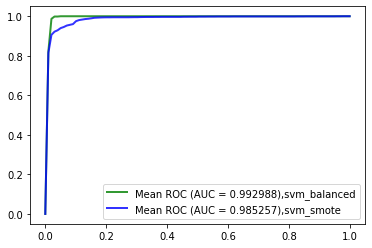

In [50]:
plotaucroc(svmbalanced,df,svmsmote,df5)

In [51]:
print_cv_results(rfsmote.mod)

AUC0 : [0.98375491]
ALL : {'mean_fit_time': array([50.31451607]), 'std_fit_time': array([5.11741782]), 'mean_score_time': array([17.22432537]), 'std_score_time': array([3.26129148]), 'param_max_samples': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[100],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'max_samples': 1000, 'n_estimators': 100}], 'split0_test_AUC': array([0.93963288]), 'split1_test_AUC': array([0.9950127]), 'split2_test_AUC': array([0.994807]), 'split3_test_AUC': array([0.99493637]), 'split4_test_AUC': array([0.99442809]), 'mean_test_AUC': array([0.98375491]), 'std_test_AUC': array([0.02207261]), 'rank_test_AUC': array([1]), 'split0_train_AUC': array([0.99885033]), 'split1_train_AUC': array([0.99505808]), 'split2_train_AUC': array([0.99480162]), 'split3_train_AUC': array([0.99440689]), 'split4_train_AUC': array([0.99504032]), 'mean_t

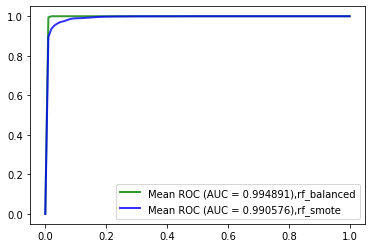

In [52]:
plotaucroc(rfbalanced,df,rfsmote,df2)

In [53]:
print_cv_results(mlpsmote.mod)

AUC0 : [0.97909434]
ALL : {'mean_fit_time': array([699.66221843]), 'std_fit_time': array([165.85061042]), 'mean_score_time': array([0.98097587]), 'std_score_time': array([0.20228913]), 'param_activation': masked_array(data=['relu'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_alpha': masked_array(data=[0.5],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(640, 320)],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=['constant'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['adam'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'activation': 'relu', 'alpha': 0.5, 'hidden_layer_sizes': (640, 320), 'learning_rate': 'constant', 'solver': 'adam'}], 'split0_test_AUC': array([0.90585973]), 'split1_test

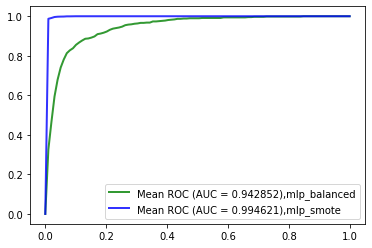

In [54]:
plotaucroc(mlpbalanced,df,mlpsmote,df5)

In [58]:
print_cv_results(rfnb.mod)

ALL : {'mean_fit_time': array([290.33292398]), 'std_fit_time': array([38.49326213]), 'mean_score_time': array([6.41812773]), 'std_score_time': array([1.28694252]), 'param_bootstrap': masked_array(data=[True],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_samples': masked_array(data=[2500],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[300],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'bootstrap': True, 'max_samples': 2500, 'n_estimators': 300}], 'split0_test_score': array([0.91337719]), 'split1_test_score': array([0.91447368]), 'split2_test_score': array([0.83205269]), 'split3_test_score': array([0.86278814]), 'split4_test_score': array([0.87486279]), 'mean_test_score': array([0.879526]), 'std_test_score': array([0.03137928]), 'rank_test_score': array([1])}


KeyError: 'mean_test_AUC'